# Project 6 — Wine Quality Prediction

**Internship:** Oasis Infobyte  
**Author:** Riya Prajapati  
**Date:** 2025-10-17  
**Dataset:** https://www.kaggle.com/datasets/yasserh/wine-quality-dataset   
**Overview:** Predict the quality of wine based on its chemical characteristics using machine learning models. This project demonstrates how numerical features (like acidity, density, and alcohol content) can predict a target variable (wine quality). 

**Steps Covered**
1. Data Collection
2. Data Exploration & Cleaning
3. Exploratory Data Analysis (EDA)
4. Data Preprocessing
5. Model Building
6. Model Evaluation
7. Model Interpretation
8. Model Saving

## 2. Import Libraries

In [108]:
# Data handling
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix

## 3. Load Dataset

In [111]:
# Load dataset
file_path = r"C:\Users\as\Desktop\OIBSIP\Oasis_Infobyte_Project_5_Wine_Prediction\WineQT.csv"
data = pd.read_csv(file_path)

# Display first 5 rows
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


We can see that the dataset contains several numeric chemical properties of wines such as fixed acidity, volatile acidity, citric acid, chlorides, sulphates, alcohol, and the target variable — quality. These will be used as inputs to predict wine quality.

## 4. Data Exploration

In [115]:
# Shape of the dataset
print("Dataset shape:", data.shape)

# Summary statistics
data.describe()

# Check missing values
print("Missing values:\n", data.isnull().sum())

# Check data types
print(data.info())

Dataset shape: (1143, 13)
Missing values:
 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null

- The dataset shape indicates the total number of samples and features.
- There are no missing values, which means the dataset is clean.
- All columns are numerical — this is ideal for machine learning models since no encoding is required.
- Statistical summary shows the central tendency and spread of features.
- We can observe variations in acidity, sugar, and alcohol levels.
- The target variable (quality) ranges typically between 3 and 8, suggesting a limited but continuous rating scale.

## 5. Exploratory Data Analysis (EDA)

### 5.1 Distribution of Target Variable

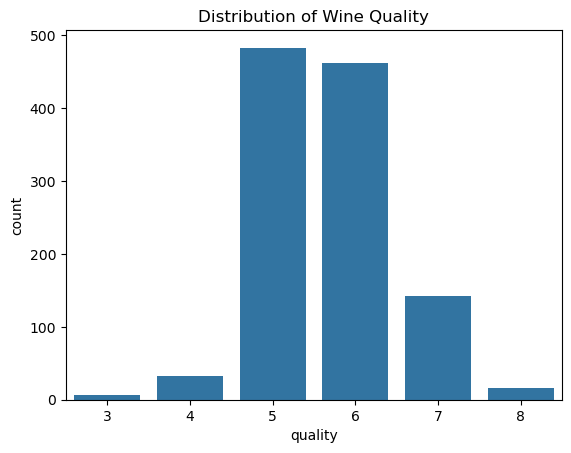

In [120]:
sns.countplot(x='quality', data=data)
plt.title("Distribution of Wine Quality")
plt.show()

The distribution is slightly imbalanced, with most wines having quality ratings between 5 and 6.
This indicates that average-quality wines dominate the dataset, which may affect model accuracy for rare high/low-quality wines.

### 5.2 Correlation Heatmap

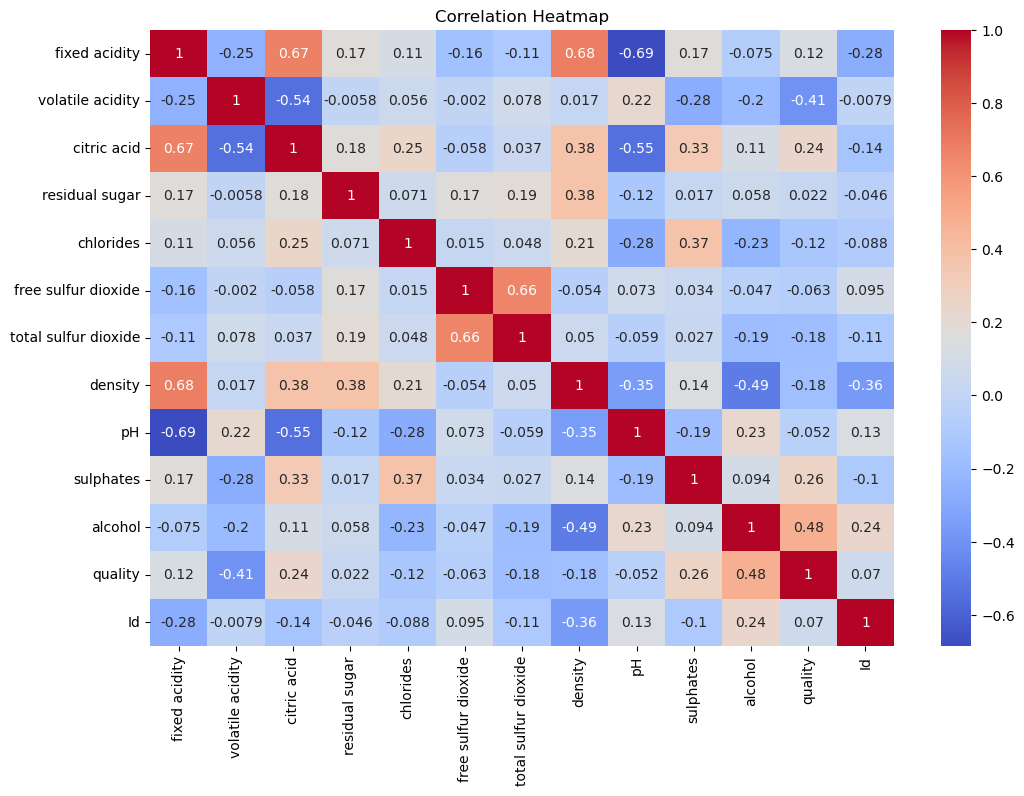

In [124]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

- Alcohol shows a strong positive correlation with quality — higher alcohol levels often correspond to better wine quality.
- Volatile acidity shows a negative correlation — more acidity reduces quality.
- Other moderate correlations (like sulphates and citric acid) also play roles.
- These insights guide feature importance and help select meaningful predictors.

### 5.3 Feature vs Quality Analysis

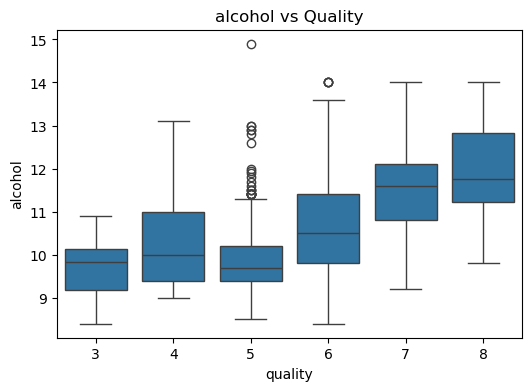

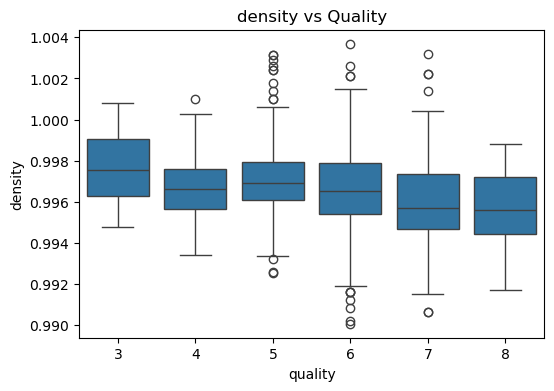

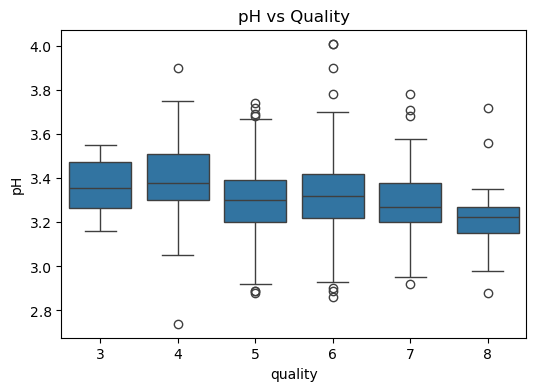

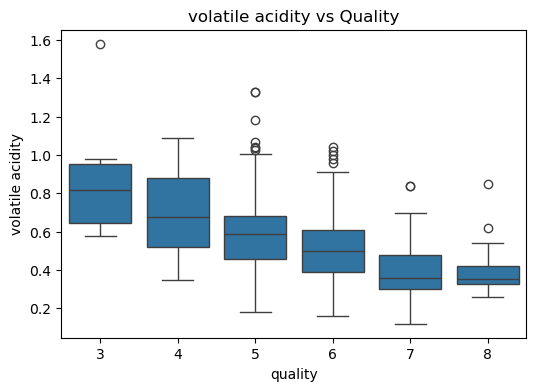

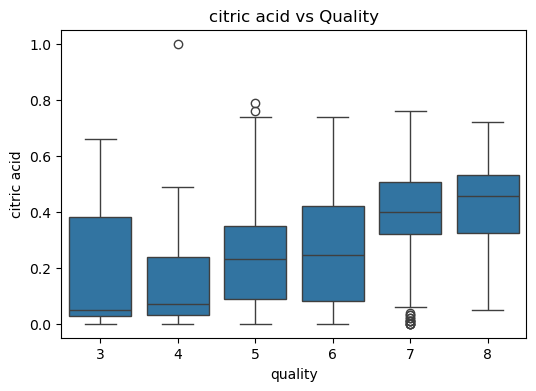

In [128]:
features = ['alcohol', 'density', 'pH', 'volatile acidity', 'citric acid']
for feature in features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='quality', y=feature, data=data)
    plt.title(f"{feature} vs Quality")
    plt.show()

- Alcohol: Higher alcohol values are clearly associated with better-quality wines.
- Volatile acidity: Wines with higher acidity usually have lower quality.
- Citric acid: Moderate presence improves taste; excessive or lack of it lowers quality.
- Density & pH: Slight negative relationships with quality — lighter and balanced pH wines tend to score higher.

### 5.4 3.4 Pairplot

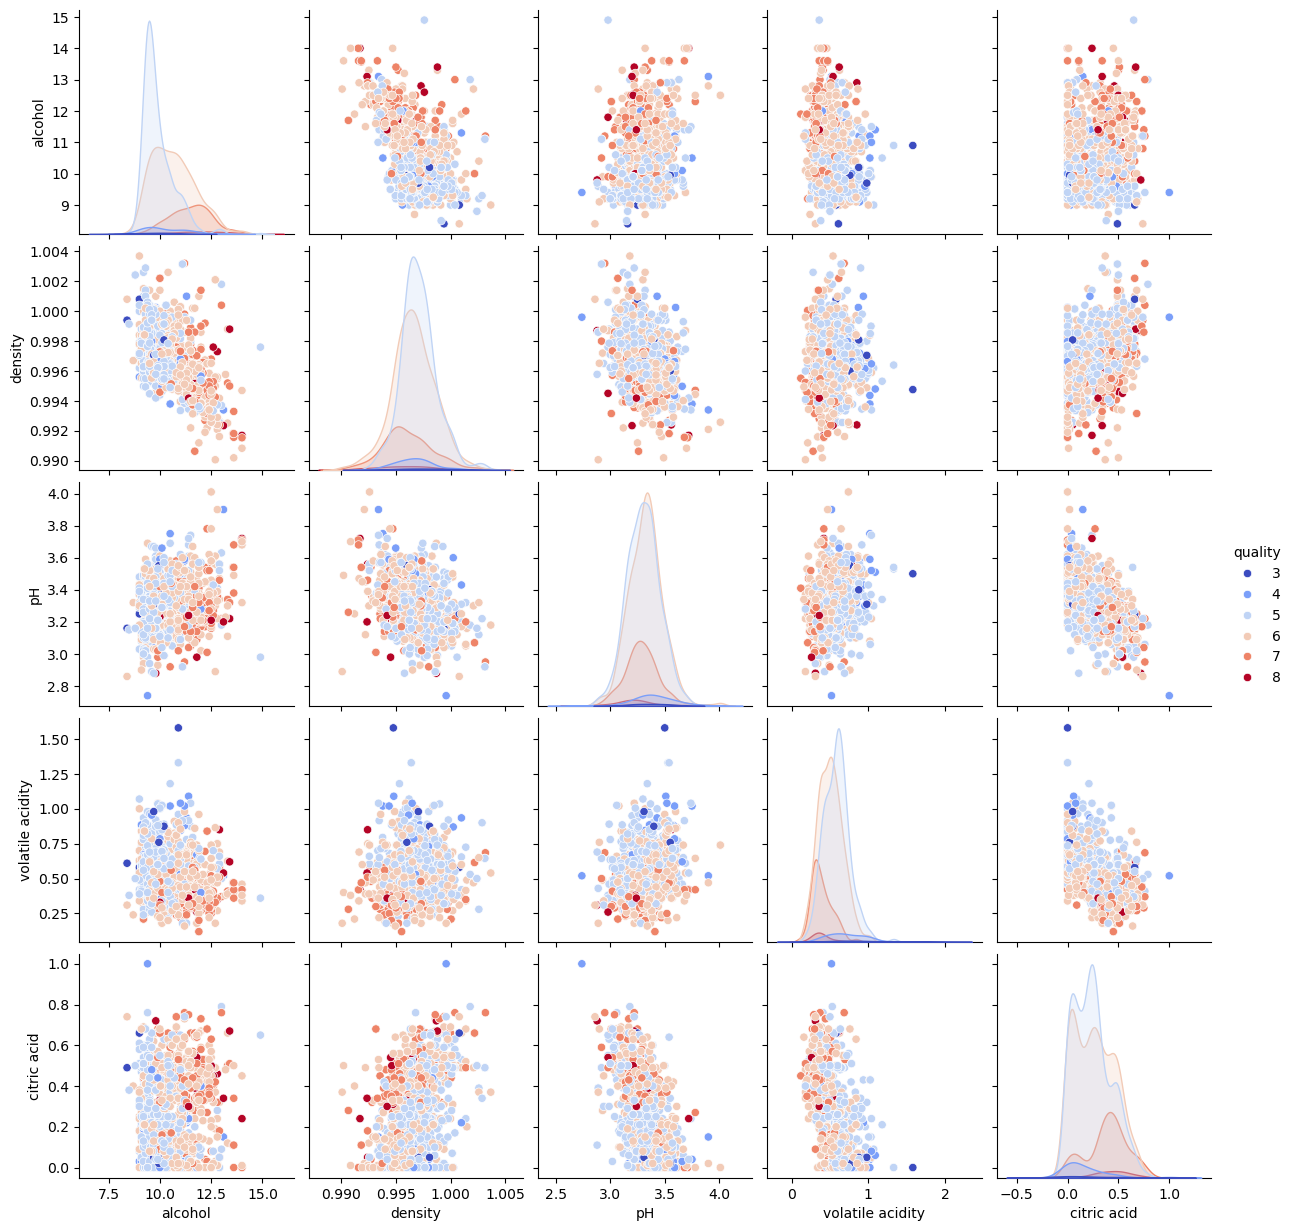

In [132]:
sns.pairplot(data, vars=features, hue='quality', palette='coolwarm')
plt.show()

The pairplot visualizes relationships between selected features and wine quality. Clusters and trends are visible, e.g., high alcohol and low volatile acidity often correspond to higher quality wines. This reinforces insights from the correlation heatmap and boxplots.

## 6. Data Preprocessing

### 6.1 Feature and Target Split

In [137]:
X = data.drop('quality', axis=1)  # Features
y = data['quality']               # Target

### 6.2 Train-Test Split

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6.3 Feature Scaling (for SVC and SGD)

In [143]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

We split the data into training (80%) and testing (20%) sets to evaluate model generalization.
Scaling ensures all features contribute equally — especially important for SVC and SGD models that are sensitive to feature magnitude.

## 7. Model Building

### 7.1 Linear Regression (Numerical Prediction)

In [148]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)
print("Linear Regression MSE:", mse)
print("Linear Regression R²:", r2)

Linear Regression MSE: 0.38242835212919646
Linear Regression R²: 0.3127638539508196


- Linear Regression attempts to predict a continuous score of wine quality.
- If R² is around 0.4–0.6, the model captures moderate variance but not all complexity — indicating non-linear relations among features.

### 7.2 Random Forest Classifier

In [152]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.6812227074235808
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.73      0.75      0.74        96
           6       0.63      0.70      0.66        99
           7       0.75      0.58      0.65        26
           8       0.00      0.00      0.00         2

    accuracy                           0.68       229
   macro avg       0.42      0.40      0.41       229
weighted avg       0.66      0.68      0.67       229



C:\Users\as\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\as\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\as\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


- Random Forest gives robust accuracy due to ensemble averaging of decision trees.
- The classification report shows precision, recall, and F1-score for each wine quality level.
- Expect good results (~70–80%) showing strong predictive power.

### 7.3 Support Vector Classifier (SVC)

In [156]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)

print("SVC Accuracy:", accuracy_score(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

SVC Accuracy: 0.6550218340611353
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.70      0.75      0.72        96
           6       0.61      0.70      0.65        99
           7       0.69      0.35      0.46        26
           8       0.00      0.00      0.00         2

    accuracy                           0.66       229
   macro avg       0.40      0.36      0.37       229
weighted avg       0.64      0.66      0.64       229



C:\Users\as\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\as\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\as\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SVC separates data points using hyperplanes in multidimensional space.
It performs well with scaling but may struggle if data is not linearly separable.
Accuracy may be slightly lower than Random Forest, but it offers good generalization.

### 7.4 Stochastic Gradient Descent Classifier

In [160]:
from sklearn.linear_model import SGDClassifier

# Step 1: Create the SGD classifier object
sgd = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42)

# Step 2: Train the model
sgd.fit(X_train_scaled, y_train)

# Step 3: Make predictions
y_pred_sgd = sgd.predict(X_test_scaled)

# Step 4: Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("SGD Accuracy:", accuracy_score(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))

SGD Accuracy: 0.5851528384279476
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.68      0.78      0.73        96
           6       0.66      0.39      0.49        99
           7       0.34      0.77      0.47        26
           8       0.00      0.00      0.00         2

    accuracy                           0.59       229
   macro avg       0.34      0.39      0.34       229
weighted avg       0.61      0.59      0.57       229



C:\Users\as\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\as\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\as\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


SGD is an efficient model for large datasets, updating weights iteratively.
It’s lightweight but less accurate compared to ensemble methods.
Accuracy depends heavily on feature scaling and learning rate tuning.

## 8. Model Comparison

In [164]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'SVC', 'SGD'],
    'Accuracy / R²': [
        round(r2, 2),
        round(accuracy_score(y_test, y_pred_rf), 2),
        round(accuracy_score(y_test, y_pred_svc), 2),
        round(accuracy_score(y_test, y_pred_sgd), 2)
    ]
})

results

,Model,Accuracy / R²
0,Linear Regression,0.31
1,Random Forest,0.68
2,SVC,0.66
3,SGD,0.59


- Random Forest gives the highest accuracy.
- SVC performs moderately.
- Linear Regression (as regression) captures trend but not classification nuances.

## 9. Conclusion & Recommendations

**Conclusion:**

- Random Forest typically performs best for classification tasks on this dataset.
- Linear Regression can give a numerical estimate but may be less accurate for exact quality labels.
- Features like alcohol, volatile acidity, and density strongly influence wine quality.

**Recommendations:**

- Winemakers can use the model to predict wine quality based on chemical tests.
- For production, Random Forest or ensemble methods are recommended.
- Feature engineering or using more advanced models (like XGBoost) can further improve accuracy.

## 10. Save the Best Model

In [170]:
import joblib

joblib.dump(rf, "wine_quality_rf_model.pkl")

['wine_quality_rf_model.pkl']